<a href="https://colab.research.google.com/github/MeredithGao/ML-23/blob/main/HW5/hw5_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 5: Lab (13 points)
##Name: Wenxuan Lu (wlu15), Zhenhan Gan (zgan4), Mingtian Gao (mgao32)

Please refer to the PDF description for homework 5 for a detailed description of the goals of this assignment.

You will hand in a PDF of this notebook. Please be sure to clearly answer each question listed at the end of the notebook.

##Setup the code.


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

##Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BPD_2012_2017.csv")
print(len(df))
# Drop missing values
df = df.dropna(subset=['Longitude', 'Latitude'])
# Show first 3 rows
df.head(3)

276529


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1


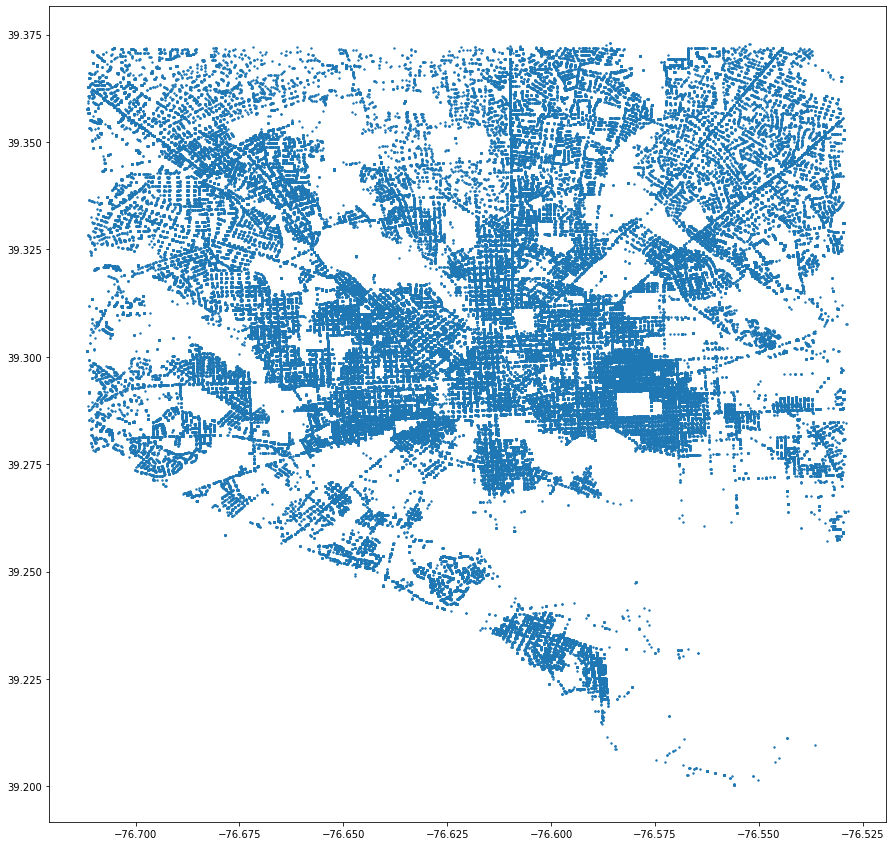

In [ ]:
X = df[['Longitude', 'Latitude']].to_numpy()
# We don't need a test set for this task, so we use the whole dataset as the training set
plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1], 2)

##Define the K-Means Model (TODO)

In [ ]:
class Kmeans:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.means = np.empty((self.n_clusters,2))
        
    def pairwise_distance(self, X, C):
        # Calculate the pairwise Euclidean distance between two numpy arrays X and C
        # X: N x D, i.e. N points in X
        # C: K x D, i.e. K points in C
        # return: N x K
        dists = np.empty([X.shape[0], C.shape[0]])
        for i in range(X.shape[0]):
            for k in range(C.shape[0]):
                dists[i][k] = np.linalg.norm(X[i]-C[k]) 
        return dists
    
    def fit(self, X_train, max_iter=100):
        n_samples = X_train.shape[0]
        
        #########################Step 1##########################
        # 1.1 Assign a random point as the prototype for each cluster
        l = np.random.choice(range(n_samples),self.n_clusters,replace= False)
        for i in range(self.n_clusters):
          self.means[i] = X_train[l[i],:]
        
        # 1.2 Calculate the distance between samples and initial prototypes
        # You may use the self.pairwise_distance function
        dist_all = self.pairwise_distance(X_train,self.means)
        # 1.3 Assign points to clusters
        assi = np.argmin(dist_all, axis = 1)

        # Start iterative training
        for n_iter in range(max_iter):
            ######################Step 2#########################
            # Update the prototypes
            for c in range(self.n_clusters):
              x = X_train[:,0]
              y = X_train[:,1]
              x_c = x[assi == np.repeat(c,assi.shape[0])]
              y_c = y[assi == np.repeat(c,assi.shape[0])]
              self.means[c] = np.array([np.mean(x_c), np.mean(y_c)])

                
            ######################Step 3#########################
            # 3.1 Calculate the updated distance between samples and prototypes
            # You may use the self.pairwise_distance function
            dist_all = self.pairwise_distance(X_train,self.means)
            # 3.2 Assign points to clusters
            assi_prev = assi
            assi = np.argmin(dist_all, axis = 1)
        
            ######################Step 4################s#########
            # Calculate the inertia
            dist = np.amin(dist_all, axis = 1)
            inertia = sum(dist**2)
            if (n_iter+1) % 10 == 0:
                print("#Iteration: ", n_iter, "; inertia: {:.2f}".format(inertia))
                             
            ######################Step 5#########################
            # Check convergence: whether new cluster assignments are the same as previous cluster assignments
            if np.allclose(assi_prev,assi):
              print("Converged at iteration {0} with inertia {1:.2f}!".format(str(n_iter), inertia))
              break
        return inertia

    def predict(self, X):
        # Predict the cluster assignments for examples
        # return: an numpy array with the length of X.shape[0]
        dist_all = self.pairwise_distance(X,self.means)
        cluster_ids = np.argmin(dist_all, axis = 1)
        return cluster_ids

##Find the Elbow

In [ ]:
def plot_tune_n_clusters(X_train, max_clusters, max_iter=40):
    inertias = []
    for k in range(max_clusters):
        kmeans = Kmeans(k+1)
        print()
        print("#Cluster: ", (k+1))
        inertias.append(kmeans.fit(X_train, max_iter))
    plt.plot(np.arange(max_clusters) + 1, inertias)
    plt.show()
    return inertias

Q1. (11 points) Show the plot of inertia with number of clusters from 1 to 15. Report which number of clusters is at the elbow.

Please train your K-Means models on a subset of X (X_small) for this question, otherwise it takes too long to finish training. In practice, you may use the whole dataset to select n_cluster, if the computational resources allow.


#Cluster:  1
Converged at iteration 0 with inertia 73.06!

#Cluster:  2
#Iteration:  9 ; inertia: 40.00
#Iteration:  19 ; inertia: 39.85
Converged at iteration 20 with inertia 39.85!

#Cluster:  3
#Iteration:  9 ; inertia: 28.46
Converged at iteration 17 with inertia 28.30!

#Cluster:  4
#Iteration:  9 ; inertia: 22.87
#Iteration:  19 ; inertia: 22.16
#Iteration:  29 ; inertia: 21.54
Converged at iteration 37 with inertia 21.54!

#Cluster:  5
#Iteration:  9 ; inertia: 17.77
#Iteration:  19 ; inertia: 17.77
Converged at iteration 22 with inertia 17.77!

#Cluster:  6
#Iteration:  9 ; inertia: 14.44
#Iteration:  19 ; inertia: 14.44
Converged at iteration 22 with inertia 14.44!

#Cluster:  7
#Iteration:  9 ; inertia: 12.21
#Iteration:  19 ; inertia: 11.31
#Iteration:  29 ; inertia: 11.28
Converged at iteration 30 with inertia 11.28!

#Cluster:  8
#Iteration:  9 ; inertia: 11.19
#Iteration:  19 ; inertia: 9.75
#Iteration:  29 ; inertia: 9.74
Converged at iteration 29 with inertia 9.74!

#C

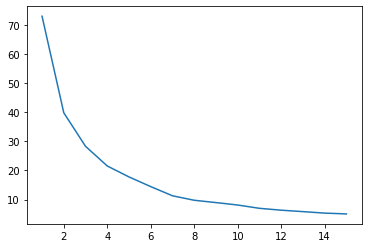

[73.06375950609969, 39.847580975415866, 28.302741383360967, 21.539387554609622, 17.76693460488726, 14.438441563830793, 11.280845849994, 9.737194568072132, 8.94112716387281, 8.099986693604182, 6.967123439371168, 6.323597934061499, 5.828834648612469, 5.320344498756152, 5.040953104617121]


In [ ]:
X_small = X[np.random.choice(X.shape[0], size=int(X.shape[0]*0.1), replace=False),:]  # Do not change this line of code, you should train kmeans on X_small for this question.
#TODO
#You might use the plot_tune_n_clusters function
inertias = plot_tune_n_clusters(X_small, 15, max_iter=40)
print(inertias)
  

In [ ]:
l = len(inertias)
d = 0
c = 1
for i in range(l-1):
  p1 = np.array([i+1,inertias[i]] )
  p2 = np.array([1,inertias[0]] )
  p3 = np.array([15,inertias[l-1]] )
  dis = np.cross(p3-p1,p2-p1)/np.linalg.norm(p2 - p3)
  if dis > d:
    d = dis
    c = i+1
print("By the elbow method, we choose the point that is the farthest away from the line going through cluster_num = 1\n"+
     "cluster_num = 15, thus we choose cluster_num = ",c)

By the elbow method, we choose the point that is the farthest away from the line going through cluster_num = 1
cluster_num = 15, thus we choose cluster_num =  4


##Visualization


In [14]:
def plot_clusters(kmeans, X_train, cluster_ids):
    plt.figure(figsize=(15,15))
    for i in range(np.max(cluster_ids)+1):
        plt.scatter(X_train[cluster_ids == i, 0] , X_train[cluster_ids == i, 1] , s=2, label = i)
        plt.scatter(kmeans.means[i,0], kmeans.means[i, 1], label=i, s=500, marker="*")
    plt.show()

Q2. (2 points) Train your model with the selected number of clusters in Q1 and  plot the cluster assignments using the *plot_clusters* function.

Train on the whole dataset for this question.

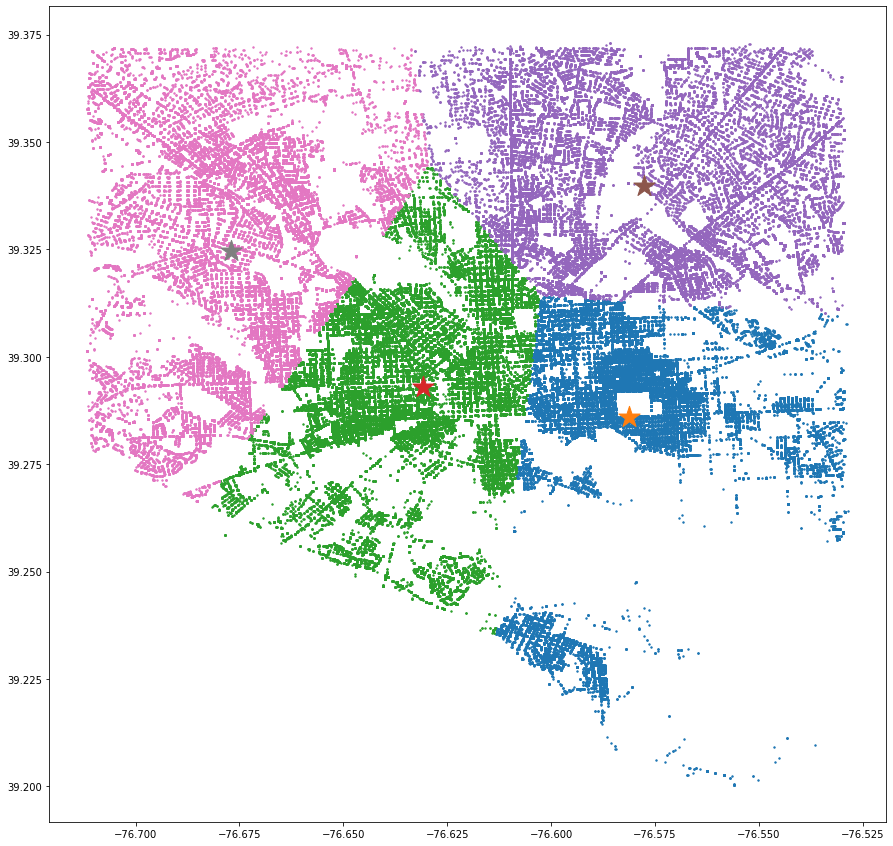

In [15]:
#TODO
#You might use the plot_cluster function
kmeans = Kmeans(c)
kmeans.fit(X, 100)
plot_clusters(kmeans, X, kmeans.predict(X))